In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\Crimes_-_2001_to_present.csv')

In [4]:
df.dropna(axis = 0, how = 'any', inplace = True)

In [6]:
print(df.dtypes)


ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                  int64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object


In [7]:
df.Date = pd.to_datetime(df.Date)

In [8]:
print(df.dtypes)

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                         int64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object


[[-87.6018587   41.78189861]
 [-87.68522097  41.98143824]
 [-87.75695851  41.89336407]
 [-87.70855502  41.8779398 ]
 [-87.66455806  41.77428688]
 [-87.62263933  41.70203025]]


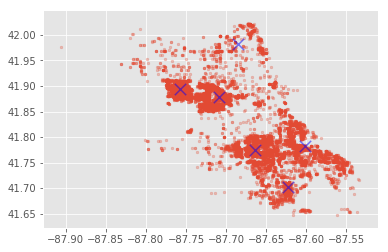

In [12]:
def doKMeans(dataframe):
  df = pd.concat([dataframe.Longitude, dataframe.Latitude], axis = 1)
  fig = plt.figure()
  ax = fig.add_subplot(111)
  ax.scatter(x = df.Longitude, y = df.Latitude, marker='.', alpha=0.3, s = 30)
  kmeans_model = KMeans(n_clusters = 6, init = 'random', n_init = 60, max_iter = 360, random_state = 43)
  labels = kmeans_model.fit_predict(df)
  centroids = kmeans_model.cluster_centers_
  ax.scatter(x = centroids[:,0], y = centroids[:,1], marker='x', c='blue', alpha=0.5, linewidths=3, s = 129)
  print (centroids)
  plt.show()
doKMeans(df)

[[-87.71029443  41.8750385 ]
 [-87.68522419  41.98536496]
 [-87.75477854  41.89006738]
 [-87.60009886  41.77766277]
 [-87.62766228  41.70801641]
 [-87.66245739  41.77705512]]


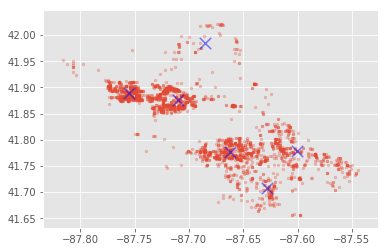

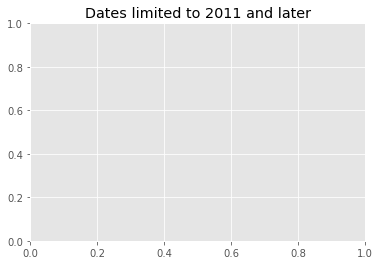

In [13]:
#crimes after 2011
df2 = df[df.Date > '2011-01-01']
doKMeans(df2)
plt.title("Dates limited to 2011 and later")
plt.show()